# Integration
Numerical integration is a fundamental skill in computational physics because it allows one to evaluate increasingly complex integrals with a high accuracy in seconds to minutes.  If you've ever tried to evaluate particularly nasty integrals, you notice that those can take pages of algebra, transformations, and still only get to an approximate form.  It is especially frustrating when one makes algebra mistakes and you have to do it over.  In this chapter, we will review basic integration methods that you've learned in Calculus and develop those methods in *python*.  After reading this chapter, check out some python packages that others have developed to make the process of numerical integration easier to access using [quadpy](https://github.com/nschloe/quadpy).

## Quadrature as box counting
The integration of a function usually requires some trickery, where you have to know which variable transformation to apply and when to apply it.  Due to the precise repetativeness of a computer, an integral can be evaluated in a straightforward manner.  You may recall that you first performed integrationby counting the number of boxes, or quadrilaterals, that you could place underneath a curve.  As a result, numerical integration is also called *quadrature* even when it comes to more complex methods.

We'll start our review with the Riemann definition of an integral, which is given as the limit of the sum over boxes of width *h*:

$\displaystyle \int_a^b f(x)dx = \lim_{h\rightarrow 0} \left[h \sum_{i=1}^{(b-a)/h} f(x_i) \right]$.

![Integration_Example](integral_example.png)

The numercial integral of a fuction *f(x)* is approximated as the equivalent of a finite sum of quadrilaterals with a height defined as *f(x)* and width $w_i$ to get:

$\displaystyle \int_a^b f(x)dx \simeq \sum_{i=1}^{N} f(x_i)w_i$. (1)

You will notice that this is similar to the Riemann definition, but the limit for an infintetesimial box size is removed and the upper limit for the summantion is redined as the number $N$ of quadrilaterals.  Finally, each of the function values $f(x_i)$ are weighted by $w_i$.  As we make $N$ larger, the approximation will become more exact but this comes at a cost.  First, a computer holds numbers to a finite precision and some values in $N$ won't increase the accuracy of the integration.  Second, we'll find that more calculations take more wall time and we may have to wait an extremely long time for the integration to finish.  Eventually we have to truncate the sum to get the "best" approximation and we have to remember that we are making a tradeoff.

Something that you should **never** do is to attempt a numerical integration when the integrand contains a singularity **without** first removing the singularity by hand.  Some ways to remove the singularity is to assign intervals so that the singularity lies at an endpoints or by a change of variable:

$\displaystyle \int_{-1}^1 |x|f(x)dx = \int_{-1}^0 f(-x)dx + \int_0^1 f(x)dx$,

or

$\displaystyle \int_0^1 x^{1/3}dx = \int_0^1 3y^3,\;\; (y=x^{1/3})$.

On the other hand, you might have an integrand that changes very quickly/slowly and scaling the boxes according to the variation may be necessary.  There are several approches to scale the boxes for your integration and we'll explore two of them in the following sections: Trapezoidal Rule and Simpson's Rule that you may recall from Calculus.

## Trapezoidal Rule

The trapezoid integration rule uses $f(x)$ at *evenly* spaced values of $x$, with $N$ points.  The first point $x_1$ locates the left-side boundary and $x_N$ locates the right-side boundary to form the integration region [$x_1$, $x_N$] or [a,b].  The brackets indicate that the endpoints are included and then we can divide up the intergtation region into $N-1$ intervals or chunks.  The interval width is defined as $h$:

$h = \frac{b-a}{N-1}$

and the location of each point along the interval is defined linearly because each interval has a fixed width.  Thus, we write the iterative formula for $x_i$ as:

$x_i = a + (i-1)h,$

where we start our counting at $i=1$.  **Does this equation return the left boundary when applying $i=1$?  What about the right boundary when $i=N$?**

![Trapezoid_Rule](Trap_rule.png)

The trapezoid rule takes each integration interval and constructs a trapezoid of width $h$.  Recall the area of a trapezoid is the average height of the two (long) parallel sides multiplied by the width.  To define the height for each side, we evaluate the function $f(x)$ at boundary points for the given interval, $f(x_i)$ and $f(x_{i+1})$.  The area of each such trapezoid is:

$\displaystyle \int_{x_i}^{x_{i+1}} f(x)dx \simeq \frac{f(x_i)+f(x_{i+1})}{2}h$.

In terms of our standard integration formula (Eq. 1 in Section 3.1), the weights $w_i = 1/2$.  To apply the trapezoidal rule to the entire integration region [a,b], we simply add the contributions from each interval:

$\displaystyle \int_a^b f(x)dx \simeq \left[\frac{h}{2}a + \frac{h}{2}f(x_2)\right] + \left[\frac{h}{2}f(x_2) + \frac{h}{2}f(x_3)\right] + \cdots + \left[\frac{h}{2}f(x_{N-1}) + \frac{h}{2}b\right]$.

You will notice that some interval points are counted twice as the end of one interval and as the beginning of the next, whereas the endpoints are just counted once.  We could now define all the weights for our standard function as:

$w_i = \left[\frac{h}{2},h,\cdots,h,\frac{h}{2} \right]$.

These weights combine the double counted intervals ($h/2 + h/2 = h$).  Now let's turn this mathematical rule into code.

In [45]:
#TrapMethods;  Trapezoid integration of a function
import numpy as np

#Define the boundary values [a,b] and the number of intervals N
a, b, N = 0., 3., 4

def func(x):
    #f(x) is a function of x
    #x is the independent variable
    print(" x, f(x) = %1.1f, %1.1f" % (x,x*x))
    return x*x 

def func_weight(i,h): 
    #weights for the trapezoid rule
    if i==1 or i== N:
        weight = h/2.
    else:
        weight = h
    return weight

#width of each interval
h = (b-a)/float(N-1)
tot_sum = 0

for i in range(1,N+1):
   x_i = a + (i-1)*h
   tot_sum += func(x_i)*func_weight(i,h) 

print(' Total sum = ', tot_sum)
print(" Analytical sum = ", (b**3/3.))

 x, f(x) = 0.0, 0.0
 x, f(x) = 1.0, 1.0
 x, f(x) = 2.0, 4.0
 x, f(x) = 3.0, 9.0
 Total sum =  9.5
 Analytical sum =  9.0


In the code, we can see each of the elements of the trapezoid rule. Most importantly, you should notice that the standard integration formulat includes a summation $\Sigma$ and in code that translates into a *for loop*.  Everything else maps directly to what you might expect.  The analytical sum is also calculated because the function $f(x) = x^2$ and we know its integral is evaluated as $x^3/3$ at the interval boundaries.  **Why are the values not equal?**  **What happens if we increase the value of $N$?**

## Simpson's Rule 
Simpson's integration rule approximates the integrand $f(x)$ by a parabola instead of a trapezoid:

$f(x) \simeq \alpha x^2 + \beta x + \gamma$,

with equally spaced intervals and ($\alpha,\beta,\gamma$) are the to be determined weights.  We can calculate the area under the parabola for each interval as:

$\displaystyle \int_{x_i}^(x_i+h) (\alpha x^2 + \beta x + \gamma)dx = \frac{\alpha x^3}{3} + \frac{\beta x^2}{2} + \gamma x \biggr\rvert_{x_i}^{x_i+h}$.

To determine the weights, let's use the interval [-1,1] and the integral becomes:

$\displaystyle \int_{-1}^1 (\alpha x^2 + \beta x + \gamma)dx = \frac{2\alpha}{3} + 2\gamma$. (2)

But we know that $f(0) = \gamma$, $f(1) = \alpha + \beta + \gamma$, and $f(-1) = \alpha - \beta + \gamma$.  The weight $\alpha$ can be determined by $f(1)$ + $f(-1)$ because the $\beta$ cancels and $\gamma$ is known directly.  The weight $\beta$ can be determined in a similar manner but through the difference to get the $\alpha$ and $\gamma$ to cancel.  Thus, we find:

$\alpha = \frac{f(1) + f(-1)}{2} - \gamma$, $\beta = \frac{f(1) - f(-1)}{2}$, $\gamma = f(0)$.

Now, we can substitute into Equation 2 the values for the weights, but in terms of function evaluations over three points:

$\displaystyle \int_{-1}^1 (\alpha x^2 + \beta x + \gamma)dx = \frac{f(1)}{3}  + \frac{4f(0)}{3} + \frac{f(-1)}{3}$.

Since three points were required, we generalize this solution to include the two endpoints of a given interval and the midpoint (which lies at $x_i + h/2$).  This can be written ast the following integral:

$\displaystyle \int_{x_i-h}^{x_i + h} f(x)dx = \int_{x_i}^{x_i+h/2} f(x) dx + \int_{x_i+h/2}^{x_i+h} f(x) dx = \frac{\alpha x^3}{3} + \frac{\beta x^2}{2} + \gamma x \biggr\rvert_{x_i}^{x_i+h/2} + \frac{\alpha x^3}{3} + \frac{\beta x^2}{2} + \gamma x \biggr\rvert_{x_i+h/2}^{x_i+h}$

or

$\displaystyle \int_{x_i-h}^{x_i + h} f(x)dx \simeq \frac{h}{6}f(x_{i}) + \frac{4h}{6}f(x_{i}+h/2) + \frac{h}{6}f(x_{i+1})$,

where the first point $x_{i}$ takes the place of -1 and the next point $x_{i+1}$ takes the place of the +1.  Simpson's rule requires the integration to be over *pairs of intervals* because it uses 3 points.  This implies that the total number of points $N$ be odd and the total number of intervals $N-1$ is even.  To apply Simpson's rule over the entire integration region, we just add up all of the intervals.  Here, the points ($f(x_1)$ and $f(x_N)$) are counted once, the points in between ($f(x_2),\ldots,f(x_{N-1})$ are counted twice, and the midpoints $f((x_i + x_{i+1})/2)$ are counted once to get:

$\displaystyle \int_a^b f(x)dx \simeq \left[ \frac{h}{6}f(x_{1}) + \frac{4h}{6}f\left(\frac{x_1+x_2}{2}\right) + \frac{h}{6}f(x_{2})\right] + \left[ \frac{h}{6}f(x_{2}) + \frac{4h}{6}f\left(\frac{x_2+x_3}{2}\right) + \frac{h}{6}f(x_{3})\right]  + \cdots + \left[ \frac{h}{6}f(x_{N-1}) +\frac{4h}{6}f\left(\frac{x_{N-1}+x_N}{2}\right)+ \frac{h}{6}f(x_{N})\right]$

or 

$\displaystyle \int_a^b f(x)dx \simeq \frac{1}{2}\sum_{i=1}^{N-1} \frac{h}{3}\left[ f(x_{i}) + 4f\left(\frac{x_i+x_{i+1}}{2}\right) + f(x_{i+1})\right]$


In [48]:
#SimpMethods;  Simpson's integration of a function
import numpy as np

#Define the boundary values [a,b] and the number of intervals N
a, b, N = 0., 3., 4

def func(x):
    #f(x) is a function of x
    #x is the independent variable
    #print(" x, f(x) = %1.1f, %1.1f" % (x,x*x))
    return x*x

#width of each interval
h = (b-a)/float(N-1)
tot_sum = 0

for i in range(1,N):
   x_left = a + (i-1)*h
   x_right = a + i*h
   x_mid = x_left + h/2
   tot_sum += (h/6.)*(func(x_left)+4*func(x_mid)+func(x_right))

print(' Total sum = ', tot_sum)
print(" Analytical sum = ", (b**3/3.))

 Total sum =  9.0
 Analytical sum =  9.0


## Gaussian Quadrature

The Trapezoid Rule and Simpson's Rule use equidistant points and weights, which is adequate for some cases.  But, we can generalize those methods by relaxing the requirement for equidistant points.  Recall that our standard integration formula is composed of a set of chosen points $x_i$ and corresponding weights $w_i$.  There is not a law stating that the $x_i$ points should be chosen a particular way.  In Gaussian quadrature methods, 

-   we choose a series of points from a complex function that can be represented as a series of polynomials (Legendre, Laguerre, etc.)
-   the benefit is that these functions can be solved on the interval [-1,1] exactly
-   perform a variable transformation to **map** the known solution onto the unknown solution [-1,1]-->[a,b]
-   the error is reduced because the approximation is more exact

Let's start with an example.  We want to select points and weights using only 2 points within the integration region.  From this goal, we write:

$\displaystyle \int_{-1}^1 f(x)dx = w_1f(x_1) + w_2f(x_2)$,

where there will be some number of polynomials of degree (2n+1) and n=1.  We set up equations for all polynomials from degree 0 to (2n + 1)

-   degree 0:  $f(x) = 1$;  $w_1 + w_2 = \displaystyle \int_{-1}^{1} 1dx = 2$
-   degree 1:  $f(x) = x$;  $w_1x_1 + w_2x_2 = \displaystyle \int_{-1}^{1} xdx = 0$
-   degree 2:  $f(x) = x^2$;  $w_1x_1^2 + w_2x_2^2 = \displaystyle \int_{-1}^{1} x^2dx = 2/3$
-   degree 3:  $f(x) = x^3$;  $w_1x_3^2 + w_2x_3^2 = \displaystyle \int_{-1}^{1} x^3dx = 0$

Now we have 4 equations and 4 unknowns.  Through some algebra, we can find that 

-   $w_1 = w_2 = 1$ (not that surprising from degree 0)
-   $x_1 = -1/\sqrt{3}$ (from degree 2)
-   $x_2 = 1/\sqrt{3}$ (from degree 2; other root)

This turns out to be the beginning of a known procedure using [Legendre polynomials](https://mathworld.wolfram.com/Legendre-GaussQuadrature.html). Now we have to apply a mapping.  The easiest map is from [-1,1]-->[a,b] uniformly, which uses the midpoint = $(a+b)/2$.  Thus, we can get the mapped points $x_i^\prime$, $w_i^\prime$ through a linear transformation:

$x_i^\prime = \frac{b+a}{2} + \frac{b-a}{2}x_i$  and  $w_i^\prime = \frac{b-a}{2}w_i$.

Other mappings can be found in the textbook: *Computational Physics - Landau, Paez, & Bordeianu* in the GitHub.  Let's turn this into some code and see how well it does.

In [59]:
#IntegGauss.py: Gaussian quadrature up to degree 4 points and weights
import numpy as np

#Define the boundary values [a,b] and the degree N
a, b, N = 0., 3., 3

def func(x):
    #function to be integrated
    return x*x

def gauss(a,b,N):
    #given an interval [a,b] this function will return the scaled points x and weights w
    x = np.zeros(N)
    w = np.zeros(N)
    if N == 2:
        x[0] = np.sqrt(3.)/3.
        x[1] = -x[0]
        w = np.ones(2)
    elif N == 3:
        x[1] = np.sqrt(15.)/5.
        x[2] = -x[1]
        w[0] = 8./9.
        w[1:] = 5./9.
    elif N == 4:
        x[0] = np.sqrt(525.-70.*np.sqrt(30.))/35.
        x[1] = -x[0]
        w[:2] = (18. + np.sqrt(30.))/36.
        x[2] = np.sqrt(525.+70.*np.sqrt(30.))/35.
        x[3] = -x[2]
        w[2:] = (18. - np.sqrt(30.))/36.
    print(x,w)
    #scale to [a,b]
    for i in range(0,N):
        x[i] = (b+a)/2. + (b-a)/2.*x[i]
        w[i] = (b-a)/2.*w[i]
    return x,w


x_scaled, w_scaled = gauss(a,b,N) #get points and weights
tot_sum = 0
for i in range(0,N):
    tot_sum += w_scaled[i]*func(x_scaled[i])

print(' Total sum = ', tot_sum)
print(" Analytical sum = ", (b**3/3.))

[ 0.          0.77459667 -0.77459667] [0.88888889 0.55555556 0.55555556]
 Total sum =  9.0
 Analytical sum =  9.0


## Integration Error

If you value your own time, then you should choose an integration rule that gives an accurate answer using the least number of integration points.  Simply, fewer integration steps implies that less work needs to be done by the computer and you obtain your result faster.  Additionally, you want an accurate answer and you must realize that we are obtaining estimates of the true answer.  Computers are able to store a finite set of numbers and this results in *errors*.  We obtain a crude estimate of the *approximation* or *algorithmic error $\varepsilon$* and the *relative error $\epsilon$* by expanding $f(x)$ in a Taylor series around the midpoint of the integration interval.  The error is mulitplied by the number of intervals for the entire integration region [a,b].  This is straightforward for the Trapezoid and Simpson rules because use equidistant intervals.  This process yields:

$\varepsilon_{\rm Trap} = O\left(\frac{[b-a]^3}{12N^2}\right)f^{\prime\prime}$ [Trapezoidal Rule](https://en.wikipedia.org/wiki/Trapezoidal_rule)

and

$\varepsilon_{\rm Simp} \sim O\left(\frac{[b-a]^5}{N^4}\right)f^{\prime\prime\prime\prime}$ [Simpsons Rule](https://en.wikipedia.org/wiki/Simpson%27s_rule),

for the apprimation errors and the relative error is simply:

$\epsilon_{\rm Trap} = \varepsilon_{\rm Trap}/f^\prime$  and $\epsilon_{\rm Simp} = \varepsilon_{\rm Simp}/f^\prime$.

A more sophsiticated integration rule leads to an error that decreases rapidly (due to the higher power of $N$) and is proportional to higher derivatives of $f$.  In most cases, we should expect Simpson's rule to converge more rapidly than the Trapezoid rule.

Another source of error is the *round-off* error, which we assume is random and can thus take the form $\epsilon_{\rm ro} \simeq \sqrt{N}\epsilon_m$.  The $\epsilon_m$ represents machine precision, which is $\epsilon \sim 10^{-15}$ for double precision (the standard for science).  You can find more on data types [here](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html).  Assuming double precision, we want to determin an $N$ that minimizes the total error (round-off + approximation), $\epsilon_{\rm tot} \simeq \epsilon_{ro} + \varepsilon$.  This occurs when the approximation error (which depends on $N$) approaches the round-off error.  Through some clever scaling, we find that

-   $N \sim 10^6$ for the Trapezoid rule
-   $N \sim 2000$ for Simpson's rule.

These results imply the following:

-   Simpson's rule is an improvement over the trapezoid rule
-   Obtaining the best numerical approximation can be acheived with $N \lesssim 1000$ instead of for $N \rightarrow \infty$

## Integration by Stone Throwing

Sometimes you need to find the area of a shape with an irregular boundary.  The standard methods can be quite complex and there are simpler means of obtaining an approximate value.  Another context is when you want to perform multidimensional integrals.  These types of integrals are easily solved through a *sampling* technique with random numbers.  

![Stone_throwing](stone_throwing.png)

Suppose you need to find the area of a pond, where most ponds are not regularly shaped due to weathering and erosion.  You can use the following algorithm:

1. Walk off a box that completely encloses the pond and remove an pebbles lying on the ground within the box.
2. Measure the lengths of the sides in natural units (feet or meters).  This tells you the area of the enclosing box $A_{\rm box}$.
3. Grab a bunch of pebbles, count their number, and throw them up in the air in random directions. (Wear a hat!)
4. Count the number of splashes in the pond $N_{\rm pond}$ and the number of pebbles lying on the ground within your box $N_{\rm box}$.
5. Assuming that you threw the pebbles randomly enough, the number of pebbles falling into the pond should be proportional to the area of the pond $A_{\rm pond}$.

The fraction of pebbles that splash in the pond relative to the total number of pebbles tells you the area within a unit box.  Multiplying by the area of the box $A_{\rm box}$ in the natural units, then allows you to find the area of the pond:

$A_{\rm pond} = \frac{N_{\rm pond}}{N_{\rm pond}+N_{\rm box}}A_{\rm box}$.

Let's use the sampling technique to perform a 2D integration to determine $\pi$ (in code!) assuming a circular pond

[3.08 3.28 3.   3.32 3.04 3.12 3.04 3.24 3.16 3.12]


Text(0, 0.5, 'Estimate of $\\pi$')

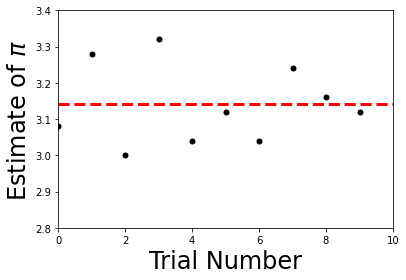

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def stone_throw(trial_idx):
    #algorithm of stone throwing
    #performing n number  of trials to see convergence
    A_box = 4 #area of the enclosing square (r = 1 or d = 2)
    N_pebbles = 100 #total number of pebbles

    N_pond = 0 #initial count of the pebbles
    for i in range(0,N_pebbles):
        x_samp = np.random.uniform(-1,1)
        y_samp = np.random.uniform(-1,1)
        r_samp = np.sqrt(x_samp**2+y_samp**2)
        if r_samp<1:
            N_pond += 1

    A_pond[trial_idx] = (N_pond/N_pebbles)*A_box

N_trials = 10
A_pond = np.zeros(N_trials)
for t in range(0,N_trials):
    stone_throw(t)
print(A_pond)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(range(0,N_trials),A_pond,'k.',ms=10)
ax.axhline(np.pi,color='r',linestyle='--',lw=3)

ax.set_xlim(0,N_trials)
ax.set_ylim(2.8,3.4)

ax.set_xlabel("Trial Number",fontsize=24)
ax.set_ylabel("Estimate of $\pi$",fontsize=24)





We found a *very* approximate value for $\pi$.  Think about how we can improve the accuracy.  

-   **Will increasing the number of trials help?**
-   **Would we want to increase the number of pebbles thrown?**
-   **How could we find the number of pebbles needed to get 3 decimal places of precision?**

## Integrating by Mean Value

In the previous section, we integrated using random values.  You might be thinking, how did that even work?  It is the standard Monte Carlo (random value) technique, which is based on the *mean value theorem* from Calculus.  Here's the equation in case you've forgotten:

$I = \displaystyle \int_a^b f(x)dx = (b-a)<f>$.

The theorem states: the value of the integral of some function $f(x)$ over the interval from $a$ to $b$ equals the lenght of the interval $(b-a)$ multiplied by the mean value of the function $<f>$ over that interval.  More simply, it states that the same area can exist under a complicated curve and within the simplest curve (a horizontal line).

![mean_value_visual](mean-value-integrals-visual)

The integration algorithm uses Monte Carlo techniques to evaluate the mean, which can be written as a summation by:

$<f> \simeq \frac{1}{N} \displaystyle \sum_{i=1}^N f(x_i)$.

This gives the very simple integration rule:

$\displaystyle \int_a^b f(x)dx \simeq \frac{b-a}{N} \sum_{i=1}^N f(x_i) = (b-a)<f>$.

This looks like our standard algorithm ($\sum_i f(x_i)w_i$), where the points are chosen randomly and with uniform weights $w_i = (b-a)/N$.  This method is not very efficient (i.e., it can take a large N to converge), but it is simple.  



## Problems

-   Complete the following problems in a Jupyter notebook, where you will save your results as an external file (*.png) as needed.
-   Create a LaTex document with:
    -   an abstract summary
    -   sections for each problem that state the problem, summarize what you did, and display the results
    -   include a reference for each solution (this can be textbooks)

1. Evaluate the following integrals using the a) Trapezoid rule, b) Simpson's Rule, and c) Gaussian quadrature.  Include a graph showing each function and shade the area.  Vary the number of intervals needed to give an 'acceptable' answer.  In your submitted work, describe your procedure for varying the intervals, how many were required for each method, and explain why each methods require more/less than the others.

    a. $\displaystyle \int_0^{\pi/2} \cos x dx$
    
    b. $\displaystyle \int_1^3 1/x^2 dx$

    c. $\displaystyle \int_2^4 x^2 + x + 1 dx$

2. Write a Python program to study projectile motion without air resistance using Simpson's rule.  Then apply your program to the following scenario:

    - You are a pirate cannoneer and your Captain (*Hector Barbossa*) has ordered you to fire the cannon to begin the siege of Port Royal.  Your Captian wants a short battle, where the British armory is destroyed first and he can begin pillaging right away to find a big hat. Thus, you must make a direct hit on the first shot.  The cannon has a muzzle speed of about 200 m/s and the firing deck is 50 m above sea level.  The Captain has anchored 2000 m off shore relative to the fort walls for the initial battle.  The armory is located at sea level an additional 57 m beyond the fort walls.  

    a.  At what angle (from the horizontal) must you fire the cannon to hit the armory?

    b.  What is the maximum height (from sea level) will the cannon fly?
    
    c.  Compare your results to expectations from theory (i.e., the kinematics you learned in pirate school).  Plot the trajectory (x,y), maximum height, and range determined from your program along with analytic values.